In [ ]:
#import the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
data=pd.read_csv("/content/cell2celltrain.csv")
data.head()
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
data.dropna()
print(data)

       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCall

In [ ]:
#this code turns the Yes and No into boolean data which can be proccessed
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
from sklearn import preprocessing
k=preprocessing.LabelEncoder()
k.fit(data['Churn'])
data['Churn']=k.transform(data['Churn'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
k=preprocessing.LabelEncoder()
k.fit(data['BuysViaMailOrder'])
data['BuysViaMailOrder']=k.transform(data['BuysViaMailOrder'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Normalises the data
scaler=StandardScaler()
df_scl=scaler.fit_transform(data)
norm=normalize(df_scl) 
df_norm=pd.DataFrame(norm)

In [ ]:
#checks the silhouette score for different number of clusters to find the best
for i in range(3,11):
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print("Silhouette score for {} clusters MiniBatch k-means : {}".format(i,metrics.silhouette_score(df_norm, minikm_labels, metric='euclidean').round(3)))

Silhouette score for 3 clusters MiniBatch k-means : 0.207
Silhouette score for 4 clusters MiniBatch k-means : 0.237
Silhouette score for 5 clusters MiniBatch k-means : 0.223
Silhouette score for 6 clusters MiniBatch k-means : 0.215
Silhouette score for 7 clusters MiniBatch k-means : 0.19
Silhouette score for 8 clusters MiniBatch k-means : 0.182
Silhouette score for 9 clusters MiniBatch k-means : 0.197
Silhouette score for 10 clusters MiniBatch k-means : 0.212


In [ ]:
#checks the Davies Bouldin score for different number of clusters to find the best
for i in [4,5,6]:
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,minikm_labels).round(3)))

Davies Bouldin Score:1.425
Davies Bouldin Score:1.475
Davies Bouldin Score:1.614


In [ ]:
#runs the algorithm on the optimal amount of clusters
minikm_labels = MiniBatchKMeans(n_clusters=4,init='random',batch_size=100000).fit_predict(df_norm)

In [ ]:
#fits the data to pca in order to plot the results
pca = PCA(n_components=7).fit_transform(df_norm)

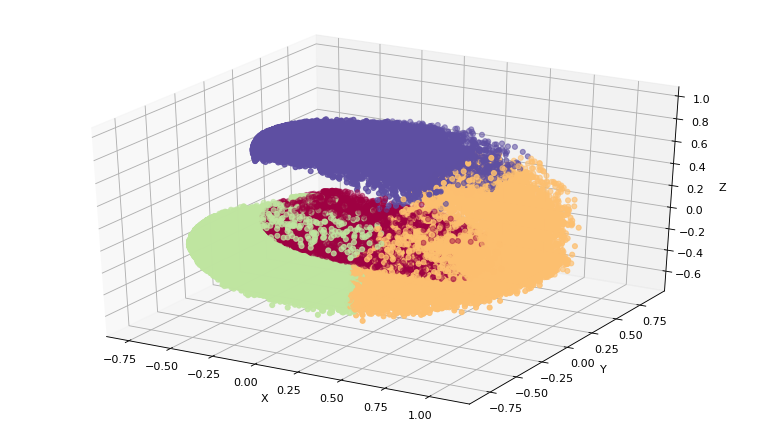

In [ ]:
#plots the result
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=minikm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [ ]:
#fits the data top pca
pca = PCA(n_components=7)
pca.fit(df_norm)
scores_pca = pca.transform(df_norm)



In [ ]:
#uses pca to segment it into 7 components
data_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_segm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3','Comp 4','Comp 5','Comp 6','Comp 7']
data_segm_pca_kmeans['Segment K-means PCA'] =minikm_labels
data_segm_pca_kmeans.head()


,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,DroppedCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,...,MonthsInService,BuysViaMailOrder,Component 1,Component 2,Component 3,Comp 4,Comp 5,Comp 6,Comp 7,Segment K-means PCA
0,1,24.00,22.0,0.25,0.0,0.0,0.7,0.0,97.2,0.0,...,61,1,-0.223375,0.581064,0.385992,0.666477,0.014857,-0.053424,-0.012546,3
1,1,16.99,17.0,0.00,0.0,0.0,0.3,0.0,0.0,0.0,...,58,1,-0.315034,0.562498,0.398830,0.624400,-0.006084,-0.049063,0.004461,3
2,0,38.00,38.0,0.00,0.0,0.0,0.0,0.0,0.4,0.3,...,60,0,-0.190019,0.086449,0.118637,0.928649,0.149571,-0.042595,-0.013263,3
3,0,82.28,75.0,1.24,0.0,0.0,52.0,1.3,200.3,370.3,...,59,1,0.736784,0.319642,-0.091130,0.305317,-0.415752,-0.378246,0.058439,0
4,1,17.14,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,53,1,-0.352649,0.572740,0.415290,0.573558,-0.015965,-0.047478,-0.002589,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


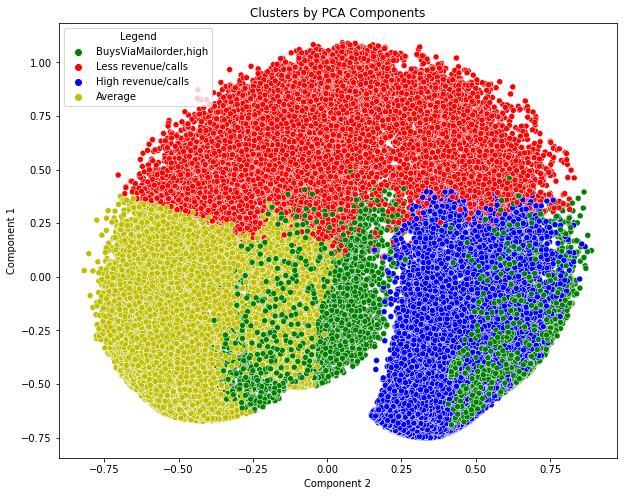

In [ ]:
#plots the results
data_segm_pca_kmeans['Legend'] = data_segm_pca_kmeans['Segment K-means PCA'].map({0:'Less revenue/calls', 
           1:'Average',
           2:'High revenue/calls', 
           3:'BuysViaMailorder,high'})
x_axis = data_segm_pca_kmeans['Component 2']
y_axis = data_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_kmeans['Legend'], palette = ['g','r','b','y'])
plt.title('Clusters by PCA Components')
plt.show()